# 1. Import Libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from os import listdir
from os.path import isfile, join

# 2. Define Functions

In [34]:
def get_hist(image):
    """
    Uses numpy to obtain the histogram of the intensity values of an image as an array. Also returns the midpoints of the bins.
    """
    hist, bins = np.histogram(img.ravel(), 256, [0, 256])  # obtain histogram using numpy
    mids = (bins[1:] + bins[:-1]) / 2  # find midpoints of each bin
    
    return hist, mids

In [77]:
def plot_random_hist(file_list, nrows, ncolumns):
    """
    Plots the histograms of a random sample of the images found in file_list on a grid of subplots. 
    """
    rand_list = np.random.choice(file_list, nrows * ncolumns, replace = False)
    img_list = [mpimg.imread(file) for file in rand_list]  # loads images as arrays
    
    #Creates histogram plots
    fig, ax = plt.subplots(nrows, ncolumns, figsize = (14, 12))
    for i, axis in enumerate(ax.ravel()):
        axis.hist(img_list[i].ravel(), 256, [0, 256])
        image_name = rand_list[i].split('L')[-1][0:4]
        axis.set_title(f'Histogram L{image_name}')

In [78]:
def plot_random(file_list, nrows, ncolumns):
    """
    Shows a random sample of images found in file_list on a grid of subplots.
    
    NOTE
    -------------------------------------------------
    Random sample can have repeats of same file
    """
    rand_list = np.random.choice(file_list, nrows * ncolumns, replace = False)
    img_list = [mpimg.imread(file) for file in rand_list]  # loads images as arrays
    
    #Show images in subplots
    fig, ax = plt.subplots(nrows, ncolumns, figsize = (14, 12))
    for i, axis in enumerate(ax.ravel()):
        axis.set_axis_off()
        axis.imshow(img_list[i])

# 3. Load Data

Load up list of files from the different directories. In this dataset, the image files are all .jpg images divided into four directories (Fibres, Films_Coated_Surface, Nanowires, and Particles). The number of files in each folder are:
1. Fibres = 150
2. Films_Coated_Surface = 309
3. Nanowires = 3815
4. Particles = 3905
5. Powder - 898


In [79]:
mypath = r'Powder'  # directory name
file_list = [f'{mypath}\{i}' for i in listdir(mypath) if isfile(join(mypath, i))]  # extracts all files from directory into a list

print (f'num files = {len(file_list)}')

num files = 898


# 4. Image Observations
Now we will display a random assortment of images from the specified directory and make some initial observations. Consistent across all images is the presence of "banners" that show measurement information. The banners are usually located on the bottom portion of the image (although not the same location every time) with different logos on the right side of the banners. Within each folder, the images also show their subjects (ie. particles, fibres, nanowires) at different levels of magnficiations with some images showing a subject very up close while other images show a subject from very far away. Below are some of the individual observations I have made from displaying images within each directory.
## Fibres
- most fibres shown are cylindrical in shape
- images rarely show a full fibre from one end to the other end
- within some images, the fibres can be grouped as thin individual fibres or a thicker group of fibres
- some images show fibres braided across each other, leading to lots of overlapping
- fibres in images have relatively same amount of "separabiity" ie. takes about similar levels of difficulty to segment objects using the human eye


## Films_Coated_Surface
- within an image, there can be very stark differences in the levels of illumination
- some of the images show films in multiple layers while other images are fairly matte
- a few of the images look like different versions of each other eg. different sections of the same image, different magnifications of the same image, rotations about different angles of the same image
- a few of the images contains a green "window" that looks like an annotation the researcher added after taking the TEM image
- image #31 and #91 are completely blank

## Nanowires
- some of the images contain a background while other images have wires covering almost the entire space
- some of the images contain a very large amount of overlapping wires
- some images have wires placed (relatively) in parallel while other images have wires oriented all over the place
- most of the wires are incredibly thin
- similar to Fibres, sometimes the individual wires form other objects which makes it difficult to intuitively know how the objects should be segemented
- one of the images contains "spots" on the wire which create lots of contrast in the image and may cause difficulties in an algorithm trying to classify it
- image #21 looks processed to the point of being unintelligible

## Particles
- different images have very different number of particles in them (some only contain one while other contain hundreds)
- some of the images (like Films_Coated_Surface) have green annotations that look like something a researcher added after taking the image
- similar to Films_Coated_Surface, there can very different levels of illumination within an image
- most particle are roughly circular in shape
- similar to Fibres and Nanowires, some of the particles seem to form aggregates which make it difficult to intuit how the objects should be segmented
- some of the images also have overlapping particles

## Powder
- very difficult to separate objects using naked eye
- most images have a gargantuan number of objects in them
- like particles, some images also seem to form aggregates
- very few images have an obvious background to distinguish separate objects
- all of the objects are incredibly small in size


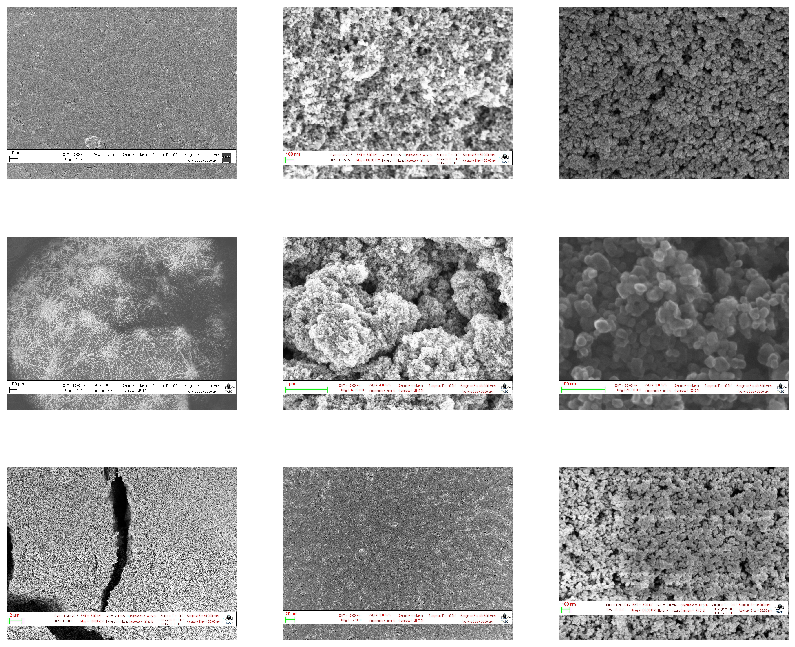

In [80]:
plot_random(file_list, 3, 3)  # Show random assortment of images from the directory

# 5. Histogram Observations

Now the histograms of a random assortment of images within the directory will be plotted and observations noted down. The histograms of all the images have roughly the same features regardless of which folder they came from. Almost all the histograms contain "spikes" in which there are some individual bins that contain a very large amount of pixels. The placement and intensity of the "spike" roughly corresponds to the shape of the general distribution. Most of the histograms also have a particularly large spike at the last bin. 

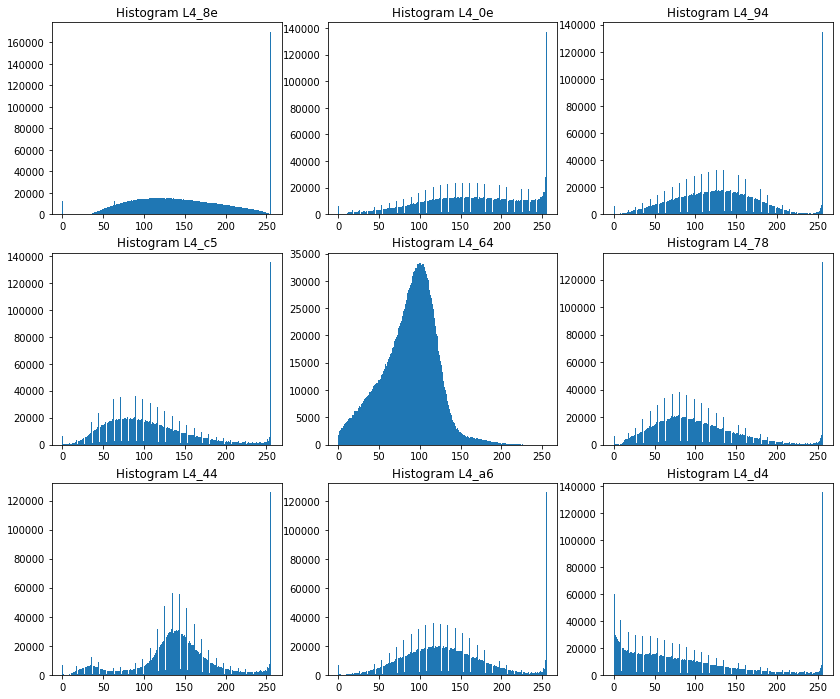

In [81]:
plot_random_hist(file_list, 3, 3)  # show random assortment of intensity histograms from directory
                                   # note: histograms displayed do not correspond to images shown in previous cell

# 6. Mean and Standard Deviation
All the images in a directory are then loaded into a list of ndarrays. The mean and standard deviation of the pixel intensities of each image is then measured and put into two separate lists. Finally the mean and standard deviation of each of the previous two lists are taken. Below are the values found for the mean and standard deviation of the list of means:

## Fibres
- mean: 114.05
- standard deviation: 20.529

## Films_Coated_Surface
- mean: 139.39
- standard deviation: 32.37

## Nanowires
- mean: 94.27
- standard deviation: 35.41

## Particles
- mean: 90.70
- standard deviation:  41.21

## Powder
- mean: 128.34
- standard deviation: 24.39

In [20]:
img_list = [mpimg.imread(file) for file in file_list]  # load up all files into a list of ndarrays

#Find mean and standard deviation of the intensity for all images and put them into a list
mean_list, std_list = [], []
for img in img_list:
    #obtain histogram as 1darray and midpoints of the bins
    hist, mids = get_hist(img)
    
    #get mean and standard deviation from the histogram
    hist_mean = np.average(mids, weights = hist)
    std = np.std(img.ravel())
    
    #put the values into a list
    mean_list.append(int(hist_mean))
    std_list.append(int(std))

In [24]:
#convert lists into arrays for easier calculations
mean_array = np.array(mean_list)
std_array = np.array(std_list)

print(f'average mean from histogram = {mean_array.mean()}')
print(f'average std from histogram = {mean_array.std()}')

average mean from histogram = 128.34187082405344
average std from histogram = 24.38833115903453


# 7. Detecting Outliers

Next is to find the outliers in the mean list. This is done by comparing the value of the item in the list with the mean listed above. If the difference is greater than three times the standard deviation listed above, it is considered an outlier. Below are the number of outliers for each directory:

- Fibres: 0
- Films_Coated_Surface: 1
- Nanowires: 13
- Particles: 35
- Powder: 2

In [25]:
#Find outliers in the mean
#If the difference between the mean of an image (mean_i) and the average mean of all images (mean_array.mean()) 
#is greater than a specified threshold, then the image is considered an outlier. The specified threshold in this case
#is twice the standard deviation of the mean_array (mean_array.std())
mean_outliers = []
for i, mean_i in enumerate(mean_array):
    if np.abs(mean_i - mean_array.mean()) > (3 * mean_array.std()):
        print(f'index = {i}, mean = {mean_i}')
        mean_outliers.append(file_list[i])
print(f'\nnum outliers = {len(mean_outliers)}')

index = 36, mean = 255
index = 290, mean = 255

num outliers = 2


# 8. Observations on Outliers

Finally, we display the outliers to make any observations on them. Below are the observations for the outliers in each directory:

## Fibres
N/A

## Films_Coated_Surface
- the single outlier is image #259 with a mean of 31
- the image is very dark with very little contrast except for very few bright spots scattered throughout

## Nanowires
- mostly white with very little contrast
- 4 of them (#179, #580, #808, #2004) are almost completely blank
- others are very grainy and look like static noise

## Particles
- mostly consists of grainy white background with flecks of black spots scattered in some areas
- particles in these images are very small

## Powder
- the two outliers are image #36 and #290 both with a mean of 255
- they're both just blank white images

IndexError: list index out of range

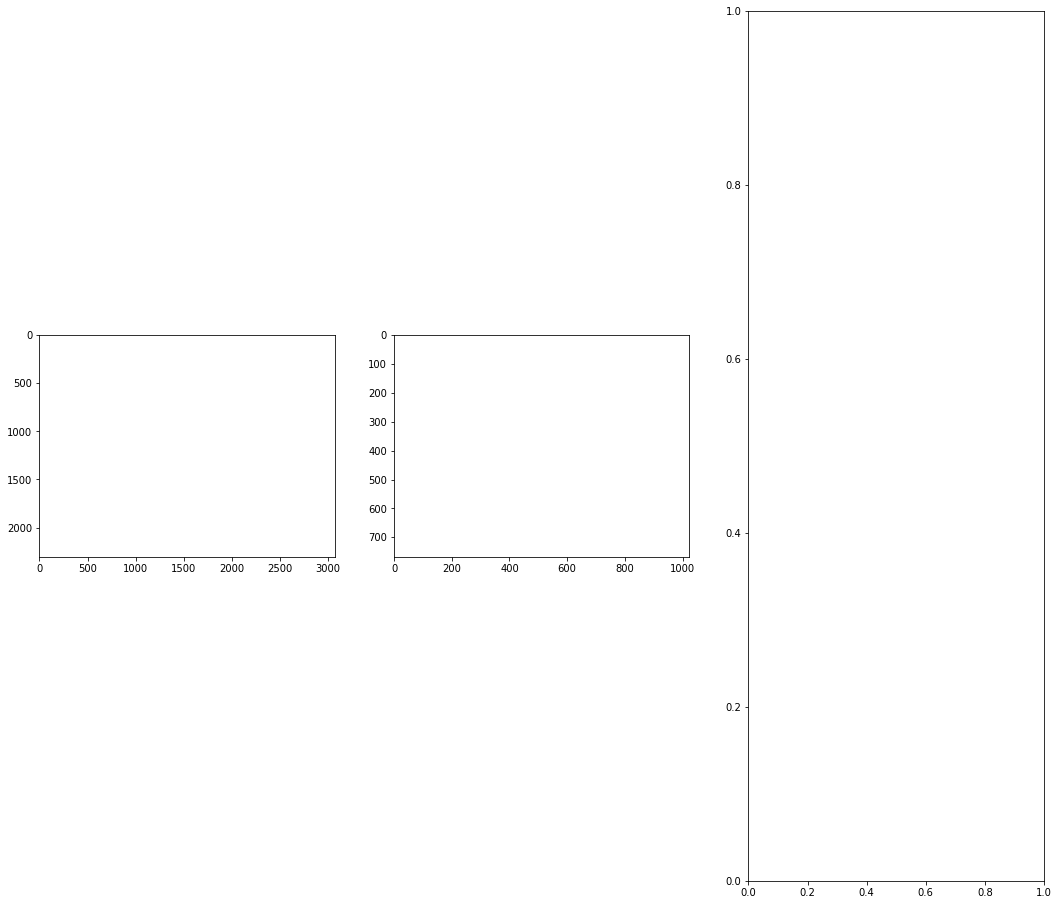

In [56]:
#Show the outliers in a grid of subplots. If the number of outliers is greater than 18, 
#only show a random sample of the images
if len(mean_outliers) < 18:
    fig, ax = plt.subplots(int(np.ceil(len(mean_outliers) / 3)), 3, figsize = (18, 16))  # create a grid with 3 columns and up to 6 rows
    for i, axis in enumerate(ax.ravel()):
        image = mpimg.imread(mean_outliers[i])
        axis.set_axis_off()
        axis.imshow(image)
else: 
    plot_random(mean_outliers, 3, 3)

In [57]:
#Find outliers in the standard deviation
#If the difference between the standard deviation of an image (std_i) and the average standard deviation of all images 
#(std_array.mean()) is greater than a specified threshold, then the image is considered an outlier. The specified threshold 
#in this case is triple the standard deviation of the std_array (std_array.std())
std_outliers = []
for i, std_i in enumerate(std_array):
    if np.abs(std_i - std_array.mean()) > (3 * std_array.std()):
        print(f'index = {i}, std = {std_i}')
        std_outliers.append(file_list[i])
print(f'\nnum outliers = {len(std_outliers)}')

index = 25, std = 86
index = 36, std = 3
index = 44, std = 88
index = 90, std = 92
index = 158, std = 86
index = 202, std = 26
index = 209, std = 105
index = 226, std = 96
index = 290, std = 0
index = 389, std = 91
index = 464, std = 23
index = 595, std = 91
index = 638, std = 23
index = 737, std = 86
index = 766, std = 100

num outliers = 15


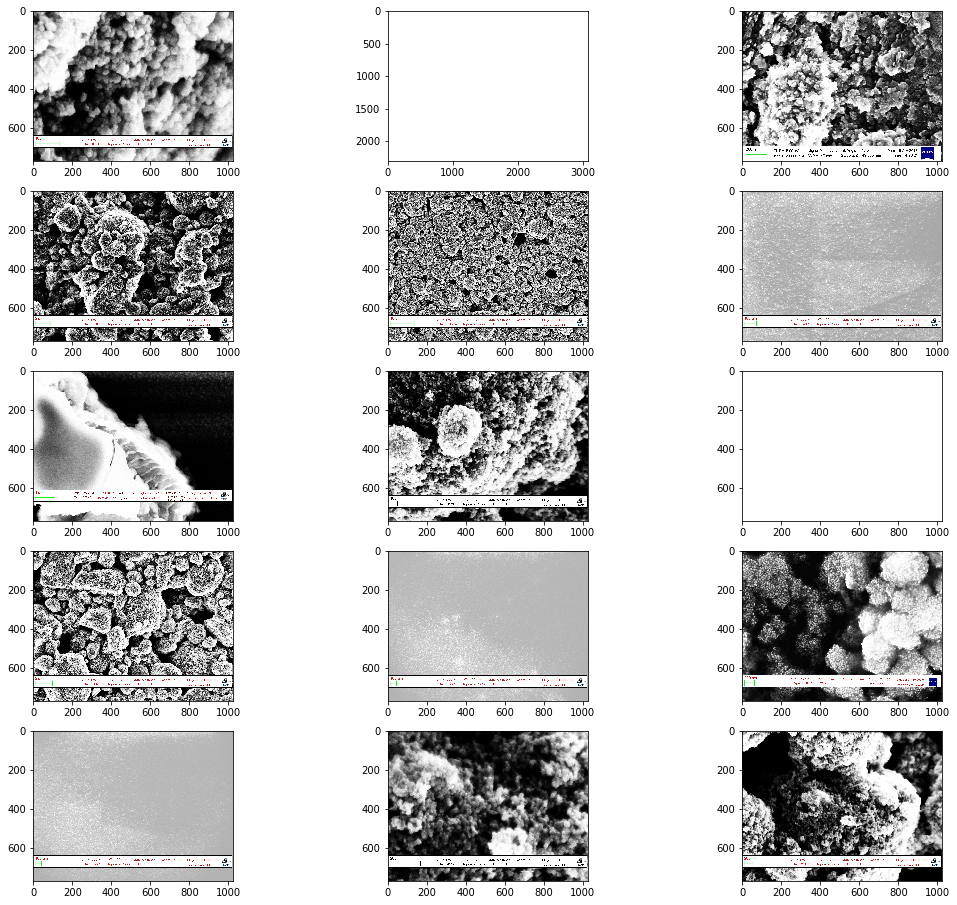

In [58]:
#Show the outliers in a grid of subplots. If the number of outliers is greater than 18, 
#only show a random sample of the images
if len(std_outliers) < 18:
    fig, ax = plt.subplots(int(np.ceil(len(std_outliers) / 3)), 3, figsize = (18, 16))  # create a grid with 3 columns and up to 6 rows
    for i, axis in enumerate(ax.ravel()):
        image = mpimg.imread(std_outliers[i])
        axis.imshow(image)
else: 
    plot_random(std_outliers, 3, 3)